## Objective - To pedict prices for cab rides of Uber and Lyft

### Table of Contents
#### 1. Importing Libraries
#### 2. Loading the data from previous jupyter notebook 
#### 3. Splitting the data into Train and Test data
#### 4. Making the data Model Ready
#### 5. Hyperparameter Tuning in Linear Regression using GridsearchCV
#### 6. Ridge Regularization
#### 7. Lasso Regularization
#### 8. Elastic Net Regularization
#### 9. Inferences and conclusions

### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import math
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

###  2. Loading the data from previous jupyter notebook

In [2]:
cab= pd.read_csv("cab.csv")
#https://stackoverflow.com/questions/43983622/remove-unnamed-columns-in-pandas-dataframe/43983654
cab.drop(cab.columns[cab.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

cab.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name,date_time,time,date,hour,day,time_of_day
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16 09:30:07.890000105,09:30:07.890000,2018-12-16,9,Sunday,Morning
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27 02:00:23.677000046,02:00:23.677000,2018-11-27,2,Tuesday,Night
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,Lyft,2018-11-28 01:00:22.197999954,01:00:22.197999,2018-11-28,1,Wednesday,Night
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,Lux Black XL,2018-11-30 04:53:02.749000072,04:53:02.749000,2018-11-30,4,Friday,Night
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,Lyft XL,2018-11-29 03:49:20.223000050,03:49:20.223000,2018-11-29,3,Thursday,Night


In [3]:
cab_df= cab.drop(["time_stamp","date_time","date"],axis=1)
cab_df.head()

,distance,cab_type,destination,source,price,surge_multiplier,name,time,hour,day,time_of_day
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared,09:30:07.890000,9,Sunday,Morning
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux,02:00:23.677000,2,Tuesday,Night
2,0.44,Lyft,North Station,Haymarket Square,7.0,1.0,Lyft,01:00:22.197999,1,Wednesday,Night
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,Lux Black XL,04:53:02.749000,4,Friday,Night
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,Lyft XL,03:49:20.223000,3,Thursday,Night


### Checking missing values

In [4]:
cab.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
name                0
date_time           0
time                0
date                0
hour                0
day                 0
time_of_day         0
dtype: int64

#### There are no missing values in the data.

In [5]:
#preprocessing of time
cab["time"] = cab["time"].str.replace(":","")
cab["time"] = cab["time"].astype(float)

#### Preprocessing price

In [6]:
scaler= StandardScaler()
cab["price"] = scaler.fit_transform(cab["price"].values.reshape(-1,1))


In [7]:
X = cab.drop(["price"], axis=1)
Y = cab["price"]

### 3. Splitting the data into Train and Test data

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33,random_state=0)
print(X_train.shape,Y_train.shape)
print(X_test.shape, Y_test.shape)

(464357, 13) (464357,)
(228714, 13) (228714,)


### 4. Making the data Model ready

### Preprocessing Categorical Features

#### destination

In [9]:
vectorizer= TfidfVectorizer()
destination = vectorizer.fit(X_train["destination"].values)
X_train_destination = vectorizer.transform(X_train["destination"].values)
X_test_destination = vectorizer.transform(X_test["destination"].values)

print(X_train_destination.shape, Y_train.shape)
print(X_test_destination.shape, Y_test.shape)

(464357, 18) (464357,)
(228714, 18) (228714,)


#### source

In [10]:
vectorizer= TfidfVectorizer()
source = vectorizer.fit(X_train["source"].values)
X_train_source = vectorizer.transform(X_train["source"].values)
X_test_source = vectorizer.transform(X_test["source"].values)

print(X_train_source.shape, Y_train.shape)
print(X_test_source.shape, Y_test.shape)

(464357, 18) (464357,)
(228714, 18) (228714,)


#### day

In [11]:
vectorizer= TfidfVectorizer()
day = vectorizer.fit(X_train["day"].values)
X_train_day = vectorizer.transform(X_train["day"].values)
X_test_day = vectorizer.transform(X_test["day"].values)

print(X_train_day.shape, Y_train.shape)
print(X_test_day.shape, Y_test.shape)

(464357, 7) (464357,)
(228714, 7) (228714,)


#### time_of_day

In [12]:
vectorizer= TfidfVectorizer()
time_day = vectorizer.fit(X_train["time_of_day"].values)
X_train_time_day = vectorizer.transform(X_train["time_of_day"].values)
X_test_time_day = vectorizer.transform(X_test["time_of_day"].values)

print(X_train_time_day.shape, Y_train.shape)
print(X_test_time_day.shape, Y_test.shape)

(464357, 4) (464357,)
(228714, 4) (228714,)


#### name

In [13]:
vectorizer= TfidfVectorizer()
name = vectorizer.fit(X_train["name"].values)
X_train_name = vectorizer.transform(X_train["name"].values)
X_test_name = vectorizer.transform(X_test["name"].values)

print(X_train_name.shape, Y_train.shape)
print(X_test_name.shape, Y_test.shape)

(464357, 11) (464357,)
(228714, 11) (228714,)


#### cab_type

In [14]:
#https://stackoverflow.com/a/613218/4084039
my_counter = Counter()
for word in cab['cab_type'].values:
    my_counter.update(word.split())

cab_dict = dict(my_counter)
sorted_cab_dict = dict(sorted(cab_dict.items(), key=lambda kv: kv[1]))

In [15]:
#one-hot encoding
vectorizer= CountVectorizer(vocabulary=list(sorted_cab_dict.keys()),lowercase=False, binary=True)

cab_type = vectorizer.fit(X_train["cab_type"].values)
X_train_cab_type = vectorizer.transform(X_train["cab_type"].values)
X_test_cab_type = vectorizer.transform(X_test["cab_type"].values)

print(X_train_cab_type.shape, Y_train.shape)
print(X_test_cab_type.shape, Y_test.shape)


(464357, 2) (464357,)
(228714, 2) (228714,)


### Preprocessing Numerical Features

#### distance

In [16]:
scaler= StandardScaler()

distance = scaler.fit(X_train["distance"].values.reshape(-1,1))
X_train_distance = scaler.transform(X_train["distance"].values.reshape(-1,1))
X_test_distance = scaler.transform(X_test["distance"].values.reshape(-1,1))

print(X_train_distance.shape, Y_train.shape)
print(X_test_distance.shape, Y_test.shape)




(464357, 1) (464357,)
(228714, 1) (228714,)


#### surge_multiplier

In [17]:
scaler= StandardScaler()

surge_multiplier = scaler.fit(X_train["surge_multiplier"].values.reshape(-1,1))
X_train_surge_multiplier = scaler.transform(X_train["surge_multiplier"].values.reshape(-1,1))
X_test_surge_multiplier = scaler.transform(X_test["surge_multiplier"].values.reshape(-1,1))

print(X_train_surge_multiplier.shape, Y_train.shape)
print(X_test_surge_multiplier.shape, Y_test.shape)


(464357, 1) (464357,)
(228714, 1) (228714,)


#### hour

In [18]:
scaler= StandardScaler()

hour = scaler.fit(X_train["hour"].values.reshape(-1,1))
X_train_hour = scaler.transform(X_train["hour"].values.reshape(-1,1))
X_test_hour = scaler.transform(X_test["hour"].values.reshape(-1,1))

print(X_train_hour.shape, Y_train.shape)
print(X_test_hour.shape, Y_test.shape)




(464357, 1) (464357,)
(228714, 1) (228714,)


#### time

In [19]:
scaler= StandardScaler()

time = scaler.fit(X_train["time"].values.reshape(-1,1))
X_train_time = scaler.transform(X_train["time"].values.reshape(-1,1))
X_test_time = scaler.transform(X_test["time"].values.reshape(-1,1))

print(X_train_time.shape, Y_train.shape)
print(X_test_time.shape, Y_test.shape)




(464357, 1) (464357,)
(228714, 1) (228714,)


### Concatenating all the features

In [20]:
#concatenating all the features

xtrain = hstack((X_train_destination,X_train_day,X_train_time,X_train_hour,X_train_surge_multiplier,X_train_cab_type,X_train_time_day,X_train_name,X_train_distance, X_train_source)).tocsr()
xtest = hstack((X_test_destination,X_test_day,X_test_time,X_test_hour,X_test_surge_multiplier,X_test_cab_type,X_test_time_day,X_test_name,X_test_distance, X_test_source)).tocsr()

print(xtrain.shape, Y_train.shape)
print(xtest.shape, Y_test.shape)



(464357, 64) (464357,)
(228714, 64) (228714,)


### 5. Hyperparameter Tuning in Linear Regression using GridsearchCV

In [42]:
from sklearn.metrics import make_scorer,mean_squared_error,accuracy_score
model = LinearRegression()
parameters= {'fit_intercept':[True,False], 'normalize':[True,False]}
reg= GridSearchCV(model, parameters, cv= 5)
reg.fit(xtrain, Y_train)
score= reg.best_score_
param= reg.best_params_
print("Best parameter is ", param)
print("Best score is", score)


Best parameter is  {'fit_intercept': True, 'normalize': False}
Best score is 0.8614980864555385


### 6. Ridge Regularization

#### Hyperparameter Tuning

In [21]:
model_1= Ridge()
parameters_1 = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf_1 = GridSearchCV(model_1,parameters_1, cv= 5, scoring = 'r2')
clf_1.fit(xtrain, Y_train)
param_1 = clf_1.best_estimator_
score_1 = clf_1.best_score_
print("Best value of lambda is ",param_1 )
print("Best score is", score_1)


Best value of lambda is  Ridge(alpha=0.1)
Best score is 0.8535953403519351


#### Variation of Coefficients with Log of Lambda

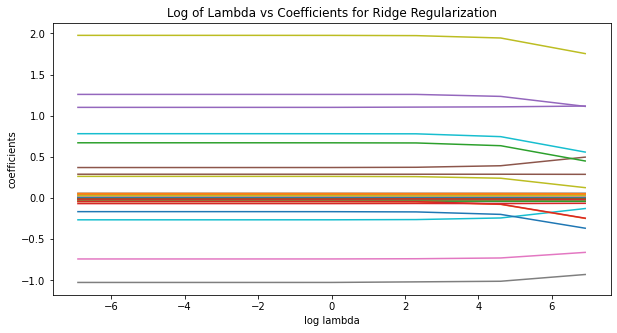

In [59]:
alpha_1 = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
coefficients_1 = []
lambda_1 = []
for i in alpha_1:
    b= np.log(i)
    lambda_1.append(b)
for i in alpha_1:
    model = Ridge(alpha = i)
    model.fit(xtrain, Y_train)
    coeff = model.coef_
    coefficients_1.append(coeff)
    


plt.figure(figsize=(10,5))
plt.plot(lambda_1,coefficients_1)
plt.xlabel("log lambda")
plt.ylabel("coefficients")
plt.title("Log of Lambda vs Coefficients for Ridge Regularization")
plt.show()

#### The coefficients are constant at all the values of log of lambda. However, as log of lambda approaches towards zero, the coefficients tend to shrink. 

In [64]:
model_1 = Ridge(alpha= 0.1)
model_1.fit(xtrain,Y_train)
coeff_1= model_1.coef_


#https://towardsdatascience.com/linear-regression-models-4a3d14b8d368
for i, j in enumerate(X_train.columns):
    print(j,":", coeff_1[i])

distance : 0.010819113532774574
cab_type : 0.010819113532774574
time_stamp : -0.009591096250214502
destination : -0.02187099223788
source : -0.0056577891757189774
surge_multiplier : -0.02084745876720991
name : -0.0077237718555984
date_time : -0.04235952292138225
time : 0.0011617981083196576
date : -0.009591096250214502
hour : 0.016261876918794323
day : 0.03305808429459951
time_of_day : -0.03761715452921257


#### Model Performance

In [50]:
model_1 = Ridge(alpha = 0.1)
model_1.fit(xtrain, Y_train)
y_pred= model_1.predict(xtest)
MSE = sklearn.metrics.mean_squared_error(Y_test, y_pred)
MAE = sklearn.metrics.mean_absolute_error(Y_test, y_pred)
RMSE = math.sqrt(MSE)
R2 = sklearn.metrics.r2_score(Y_test, y_pred)
print("Mean Squared Error is", MSE)
print("Mean Absolute Error is", MAE)
print("Root Mean Squared Error is", RMSE)
print("R2 score is:", R2)
                                          

Mean Squared Error is 0.14550140422000235
Mean Absolute Error is 0.2516443614906708
Root Mean Squared Error is 0.38144646311114533
R2 score is: 0.8545922452816294


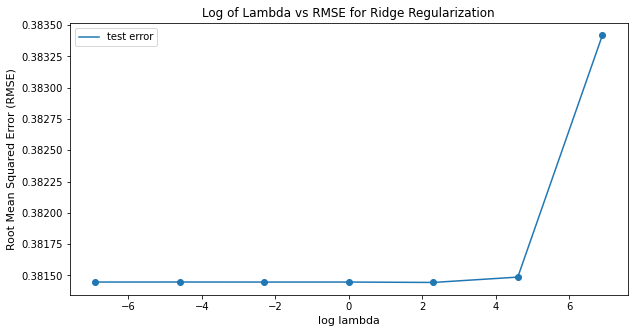

In [53]:
alpha_1 = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_error = []
test_error = []
lambda_1 = []
for i in alpha_1:
    b= np.log(i)
    lambda_1.append(b)
for i in alpha_1:
    model_1 = Ridge(i)
    model_1.fit(xtrain,Y_train)
    y_te_pred= model_1.predict(xtest)
    mse_2 = sklearn.metrics.mean_squared_error(Y_test, y_te_pred)
    rmse_2 = np.sqrt(mse_2)
    test_error.append(rmse_2)
    
plt.figure(figsize=(10,5))
plt.plot(lambda_1, test_error, label='test error')
plt.scatter(lambda_1, test_error)
plt.xlabel("log lambda", fontsize = 11)
plt.ylabel("Root Mean Squared Error (RMSE)", fontsize = 11)
plt.title("Log of Lambda vs RMSE for Ridge Regularization", fontsize = 12)
plt.legend()
plt.show()
    


#### RMSE values for test data are constant at lower values of log of lambda.  

### 7. Lasso Regularization

#### Hyperparameter Tuning

In [52]:
model_2 = Lasso()
parameters_2 = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf_2 = GridSearchCV(model_2,parameters_2, cv= 5 , scoring = 'r2' )
clf_2.fit(xtrain, Y_train)
params_2 = clf_2.best_estimator_
score_2 = clf_2.best_score_
print("Best value of lambda is ", params_2)
print("Best score is", score_2)

Best value of lambda is  Lasso(alpha=0.001)
Best score is 0.8530761127800659


#### Variations of Coefficients with Log of Lambda

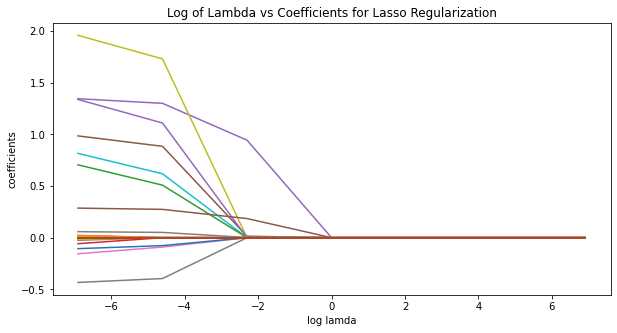

In [61]:
alpha_2 = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
lambda_2 = []
for i in alpha_2:
    b= np.log(i)
    lambda_2.append(b)
coefficient_2 = []
for i in alpha_2:
    model_2 = Lasso(alpha= i)
    model_2.fit(xtrain,Y_train)
    coeff_2= model_2.coef_
    coefficient_2.append(coeff_2)

    
plt.figure(figsize=(10,5))
plt.plot(lambda_2, coefficient_2)
plt.xlabel("log lamda")
plt.ylabel("coefficients")
plt.title("Log of Lambda vs Coefficients for Lasso Regularization")
plt.show()

#### The coefficients above zero are positive and the coefficients below zero are negative. The plot shows how the coefficients vary below the log lambda value of zero.

In [65]:
model_2 = Lasso(alpha= 0.001)
model_2.fit(xtrain,Y_train)
coeff_2= model_2.coef_
coefficient_2.append(coeff_2)

#https://towardsdatascience.com/linear-regression-models-4a3d14b8d368
for i, j in enumerate(X_train.columns):
    print(j,":", coeff_2[i])

distance : 0.0
cab_type : 0.0
time_stamp : -0.0
destination : -0.0
source : -0.0
surge_multiplier : -0.0
name : -0.0
date_time : -0.024747690110682695
time : -0.0
date : -0.0
hour : 0.002508279782662061
day : 0.01951373621022991
time_of_day : -0.005198755761046762


#### Model Performance

In [54]:
model_2 = Lasso(alpha = 0.001)
model_2.fit(xtrain, Y_train)
y_pred= model_2.predict(xtest)
MSE = sklearn.metrics.mean_squared_error(Y_test, y_pred)
MAE = sklearn.metrics.mean_absolute_error(Y_test, y_pred)
RMSE = math.sqrt(MSE)
R2 = sklearn.metrics.r2_score(Y_test, y_pred)
print("Mean Squared Error is", MSE)
print("Mean Absolute Error is", MAE)
print("Root Mean Squared Error is", RMSE)
print("R2 score is:", R2)
                         

Mean Squared Error is 0.14600565346505615
Mean Absolute Error is 0.25265763520715706
Root Mean Squared Error is 0.38210686131638116
R2 score is: 0.8540883205880172


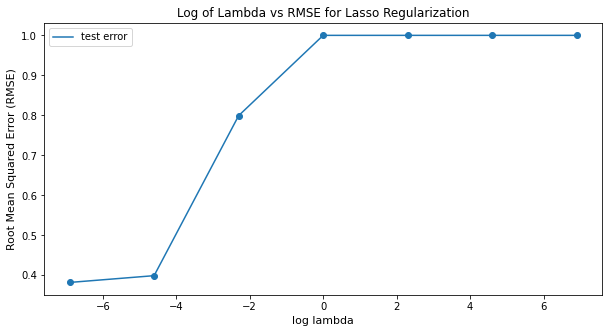

In [52]:
alpha_2 = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_error = []
test_error = []
lambda_2 = []
for i in alpha_2:
    b= np.log(i)
    lambda_2.append(b)
for i in alpha_2:
    model_2 = Lasso(alpha = i)
    model_2.fit(xtrain, Y_train)
    y_tr_pred= model_2.predict(xtrain)
    
    y_te_pred= model_2.predict(xtest)
    mse_2 = sklearn.metrics.mean_squared_error(Y_test, y_te_pred)
    rmse_2 = np.sqrt(mse_2)
    test_error.append(rmse_2)
    
plt.figure(figsize=(10,5))
plt.plot(lambda_2, test_error, label='test error')
plt.scatter(lambda_2, test_error)
plt.xlabel("log lambda", fontsize = 11)
plt.ylabel("Root Mean Squared Error (RMSE)", fontsize = 11)
plt.title("Log of Lambda vs RMSE for Lasso Regularization", fontsize = 12)
plt.legend()
plt.show()
    


#### At lower values of log of lambda, the error is less. However, it is increasing with the increase in log of lambda.

### 8. Elastic Net Regularization

#### Hyperparameter Tuning

In [56]:
model_3= ElasticNet()
parameters_3 = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf_3 = GridSearchCV(model_3,parameters_3, cv= 5, scoring = 'r2')
clf_3.fit(xtrain, Y_train)
param_3 = clf_3.best_estimator_
score_3 = clf_3.best_score_
print("Best value of lambda is ",param_3 )
print("Best score is", score_3)



Best value of lambda is  ElasticNet(alpha=0.001)
Best score is 0.853423020951275


#### Variation of Coefficients at different values of Log of Lambda

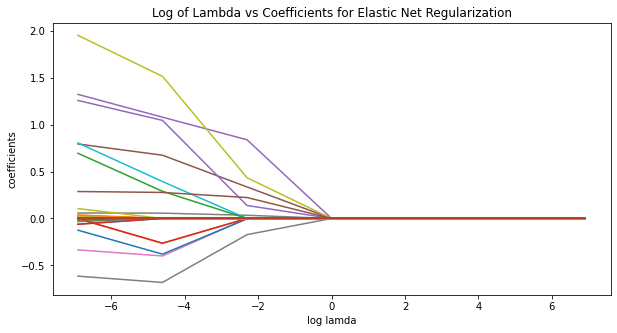

In [66]:
alpha_3 = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
lambda_3 = []
for i in alpha_3:
    b= np.log(i)
    lambda_3.append(b)
coefficient_3 = []
for i in alpha_3:
    model_3 = ElasticNet(alpha= i)
    model_3.fit(xtrain,Y_train)
    coeff_3= model_3.coef_
    coefficient_3.append(coeff_3)


    
plt.figure(figsize=(10,5))
plt.plot(lambda_3, coefficient_3)
plt.xlabel("log lamda")
plt.ylabel("coefficients")
plt.title("Log of Lambda vs Coefficients for Elastic Net Regularization")
plt.show()

#### When lamda becomes zero, there is no regularization. The coefficients become unregularized and those variables that are shrinking at zero can be discarded as part of feature selection.

In [68]:
model_3 = ElasticNet(alpha= 0.001)
model_3.fit(xtrain,Y_train)
coeff_3= model_3.coef_

#https://towardsdatascience.com/linear-regression-models-4a3d14b8d368
for i, j in enumerate(X_train.columns):
    print(j,":", coeff_3[i])

distance : 0.006073983384175007
cab_type : 0.006060224571099087
time_stamp : -0.002057205860644651
destination : -0.00021721097705552944
source : -0.0
surge_multiplier : -0.0
name : -0.0
date_time : -0.0330742510561407
time : 0.0
date : -0.002051225907953405
hour : 0.006898521194535255
day : 0.03307067869504214
time_of_day : -0.01822584241137497


#### Model Performance

In [58]:
model_3 = ElasticNet(alpha = 0.001)
model_3.fit(xtrain, Y_train)
y_pred= model_3.predict(xtest)
MSE = sklearn.metrics.mean_squared_error(Y_test, y_pred)
MAE = sklearn.metrics.mean_absolute_error(Y_test, y_pred)
RMSE = math.sqrt(MSE)
R2 = sklearn.metrics.r2_score(Y_test, y_pred)
print("Mean Squared Error is", MSE)
print("Mean Absolute Error is", MAE)
print("Root Mean Squared Error is", RMSE)
print("R2 score is:", R2)

Mean Squared Error is 0.14567007371018154
Mean Absolute Error is 0.2524572976812841
Root Mean Squared Error is 0.3816674910313708
R2 score is: 0.8544236843526959


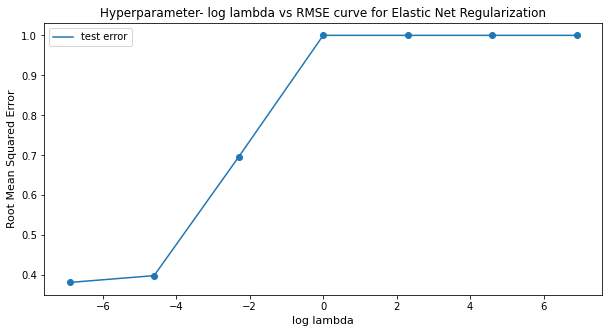

In [54]:
alpha_3 = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_error = []
test_error = []
lambda_3 = []
for i in alpha_3:
    b= np.log(i)
    lambda_3.append(b)
for i in alpha_3:
    model_3 = ElasticNet(alpha = i)
    model_3.fit(xtrain, Y_train)
    
    y_te_pred= model_3.predict(xtest)
    mse_2 = sklearn.metrics.mean_squared_error(Y_test, y_te_pred)
    rmse_2 = np.sqrt(mse_2)
    test_error.append(rmse_2)
    
plt.figure(figsize=(10,5))
plt.plot(lambda_1, test_error, label='test error')
plt.scatter(lambda_1, test_error)
plt.xlabel("log lambda", fontsize = 11)
plt.ylabel("Root Mean Squared Error", fontsize = 11)
plt.title("Hyperparameter- log lambda vs RMSE curve for Elastic Net Regularization", fontsize = 12)
plt.legend()
plt.show()
    


#### RMSE value increses as log of lambda approches towards zero. 

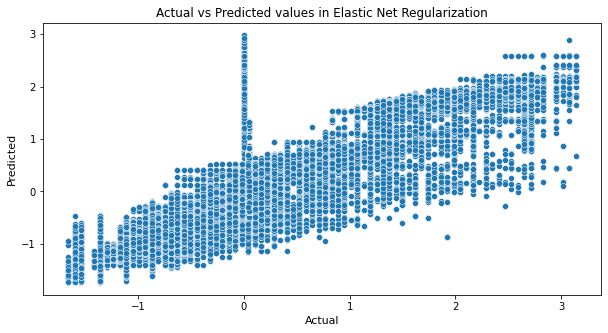

In [105]:
model_3 = ElasticNet(alpha = 0.001)
model_3.fit(xtrain, Y_train)
y_pred_3 = model_3.predict(xtest)

plt.figure(figsize=(10,5))
sns.scatterplot(x= Y_test, y= y_pred_3)
plt.xlabel("Actual", fontsize = 11)
plt.ylabel("Predicted", fontsize= 11)
plt.title("Actual vs Predicted values in Elastic Net Regularization", fontsize =12)
plt.show()




#### There is a significant deviation of predicted values from actual values near about zero. 

### 9. Inferences and Conclusions

#### 1. Data preprocessing has been performed to make the data model ready.
#### 2. Linear Regression does not have lambda as its parameter. So, after performing hyperparameter tuning using GridsearchCV, we have got fit_intercept = True and normalize = False as the best parameters.
#### 3. Regularization has been used to avoid the problem of multicollinearity.